# **Decision Tree**

In [1]:
# import libraries

# 1. to handle the data
import pandas as pd
import numpy as np

# 2. To Viusalize the data
import matplotlib.pyplot as plt
import seaborn as sns

# 3. To preprocess the data
from sklearn.preprocessing import StandardScaler, LabelEncoder


# 4. Machine Learning
from sklearn.model_selection import train_test_split

# 6. For Classification task.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

### EDA

In [2]:
data = pd.read_csv('heart_disease.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


In [3]:
data.shape

(908, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [5]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [6]:
# check for null values
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [7]:
# Fill null values with the mean
for col in data.columns:
    if data[col].isnull().any():
        mean_val = data[col].mean()
        data[col].fillna(mean_val, inplace=True)

In [8]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


In [9]:
# check for duplicates

duplicates = data.duplicated()
num_duplicates = duplicates.sum()

print(f"Number of duplicate rows: {num_duplicates}")

if num_duplicates > 0:
    print("Duplicate rows:")
data[duplicates]


Number of duplicate rows: 1
Duplicate rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
765,58,Male,non-anginal,150,219,False,st-t abnormality,118,TRUE,0.0,downsloping,normal,2


In [10]:
# remove the duplicate row
data.drop_duplicates(inplace=True)
print("\nDataFrame after removing duplicates:")
data.shape


DataFrame after removing duplicates:


(907, 13)

In [11]:
# Check for duplicates
duplicates = data.duplicated()
num_duplicates = duplicates.sum()

print(f"Number of duplicate rows: {num_duplicates}")

if num_duplicates > 0:
    print("Duplicate rows:")
data[duplicates]

Number of duplicate rows: 0


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num


### Data Visualization

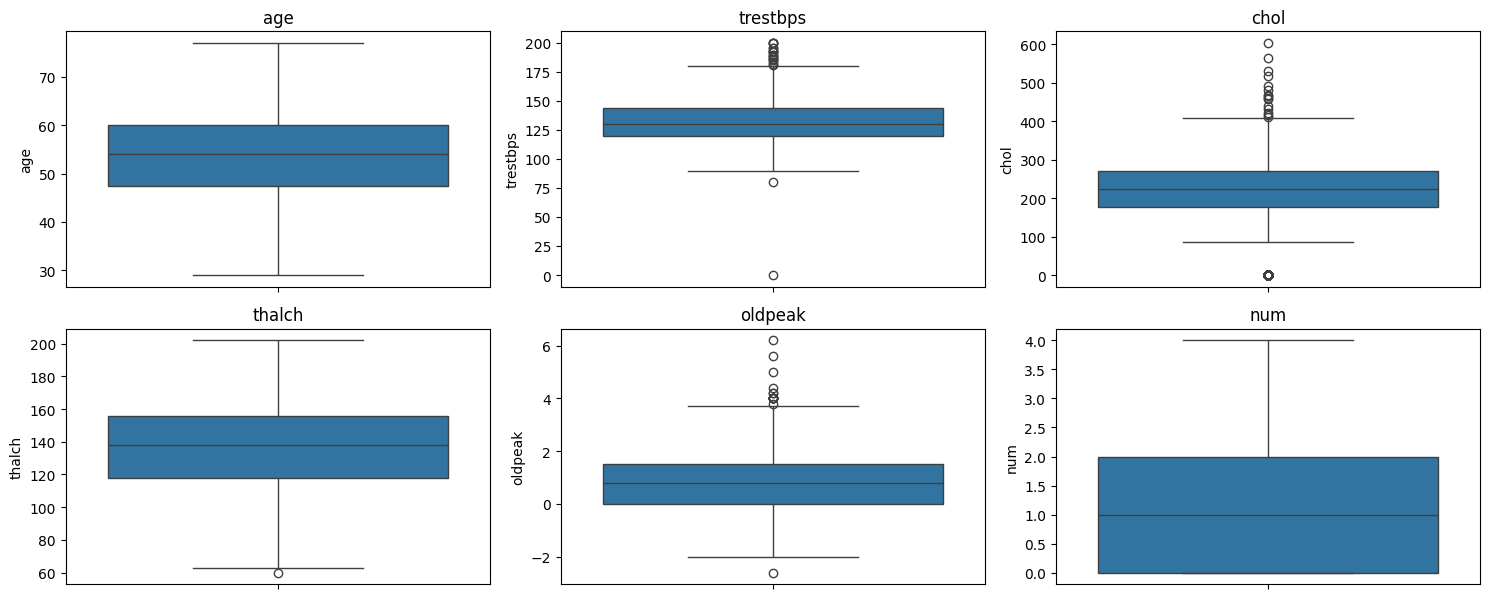

In [12]:
# boxplots of all numerical variables

plt.figure(figsize=(15, 12))
for i, col in enumerate(data.select_dtypes(include=np.number).columns):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [13]:
# remove the outliers and fill them using capping method

def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.clip(df[column], lower_bound, upper_bound)
    return df

# Apply capping to specified columns
for col in ['trestbps', 'chol', 'thalch', 'oldpeak']:
    data = cap_outliers(data, col)

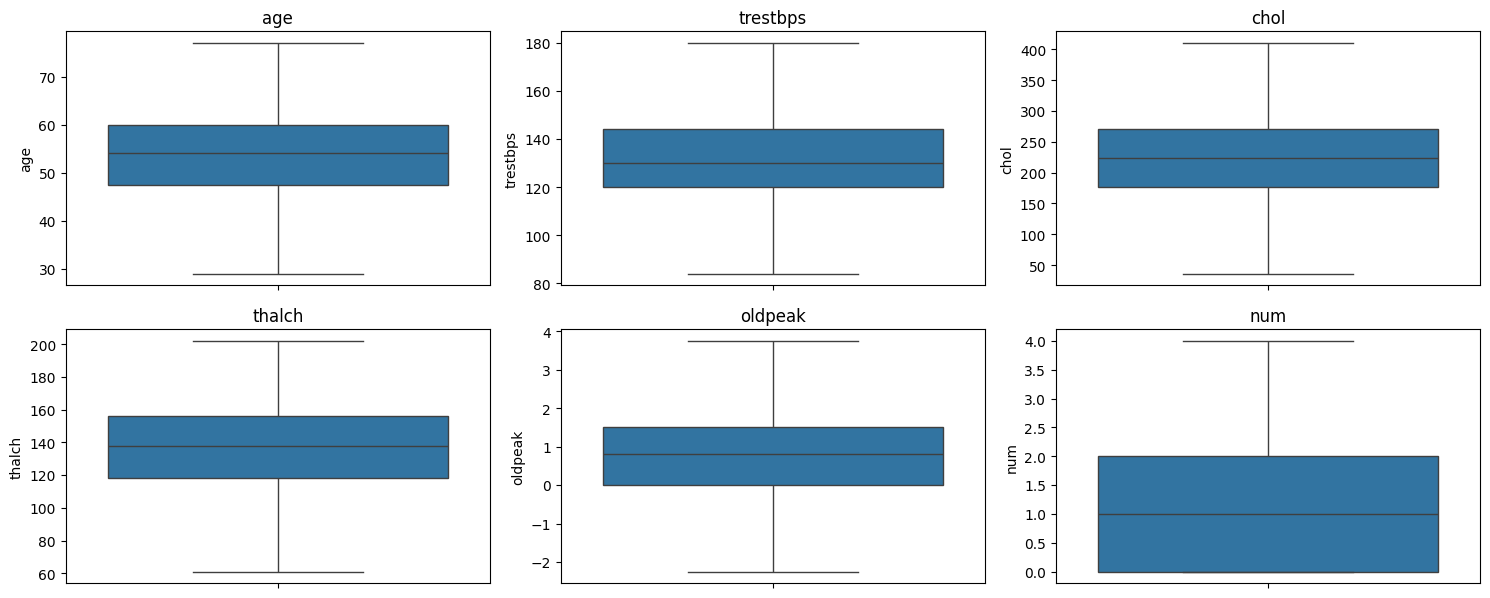

In [14]:
# boxplots to check outliers
plt.figure(figsize=(15, 12))
for i, col in enumerate(data.select_dtypes(include=np.number).columns):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [15]:
hd_num=data.drop(data.columns[[1,2,5,6,8,10,11]],axis=1)
hd_num.head()

,age,trestbps,chol,thalch,oldpeak,num
0,63,145,233.0,150,2.3,0
1,41,135,203.0,132,0.0,0
2,57,140,192.0,148,0.4,0
3,52,118,186.0,190,0.0,0
4,57,110,201.0,126,1.5,0


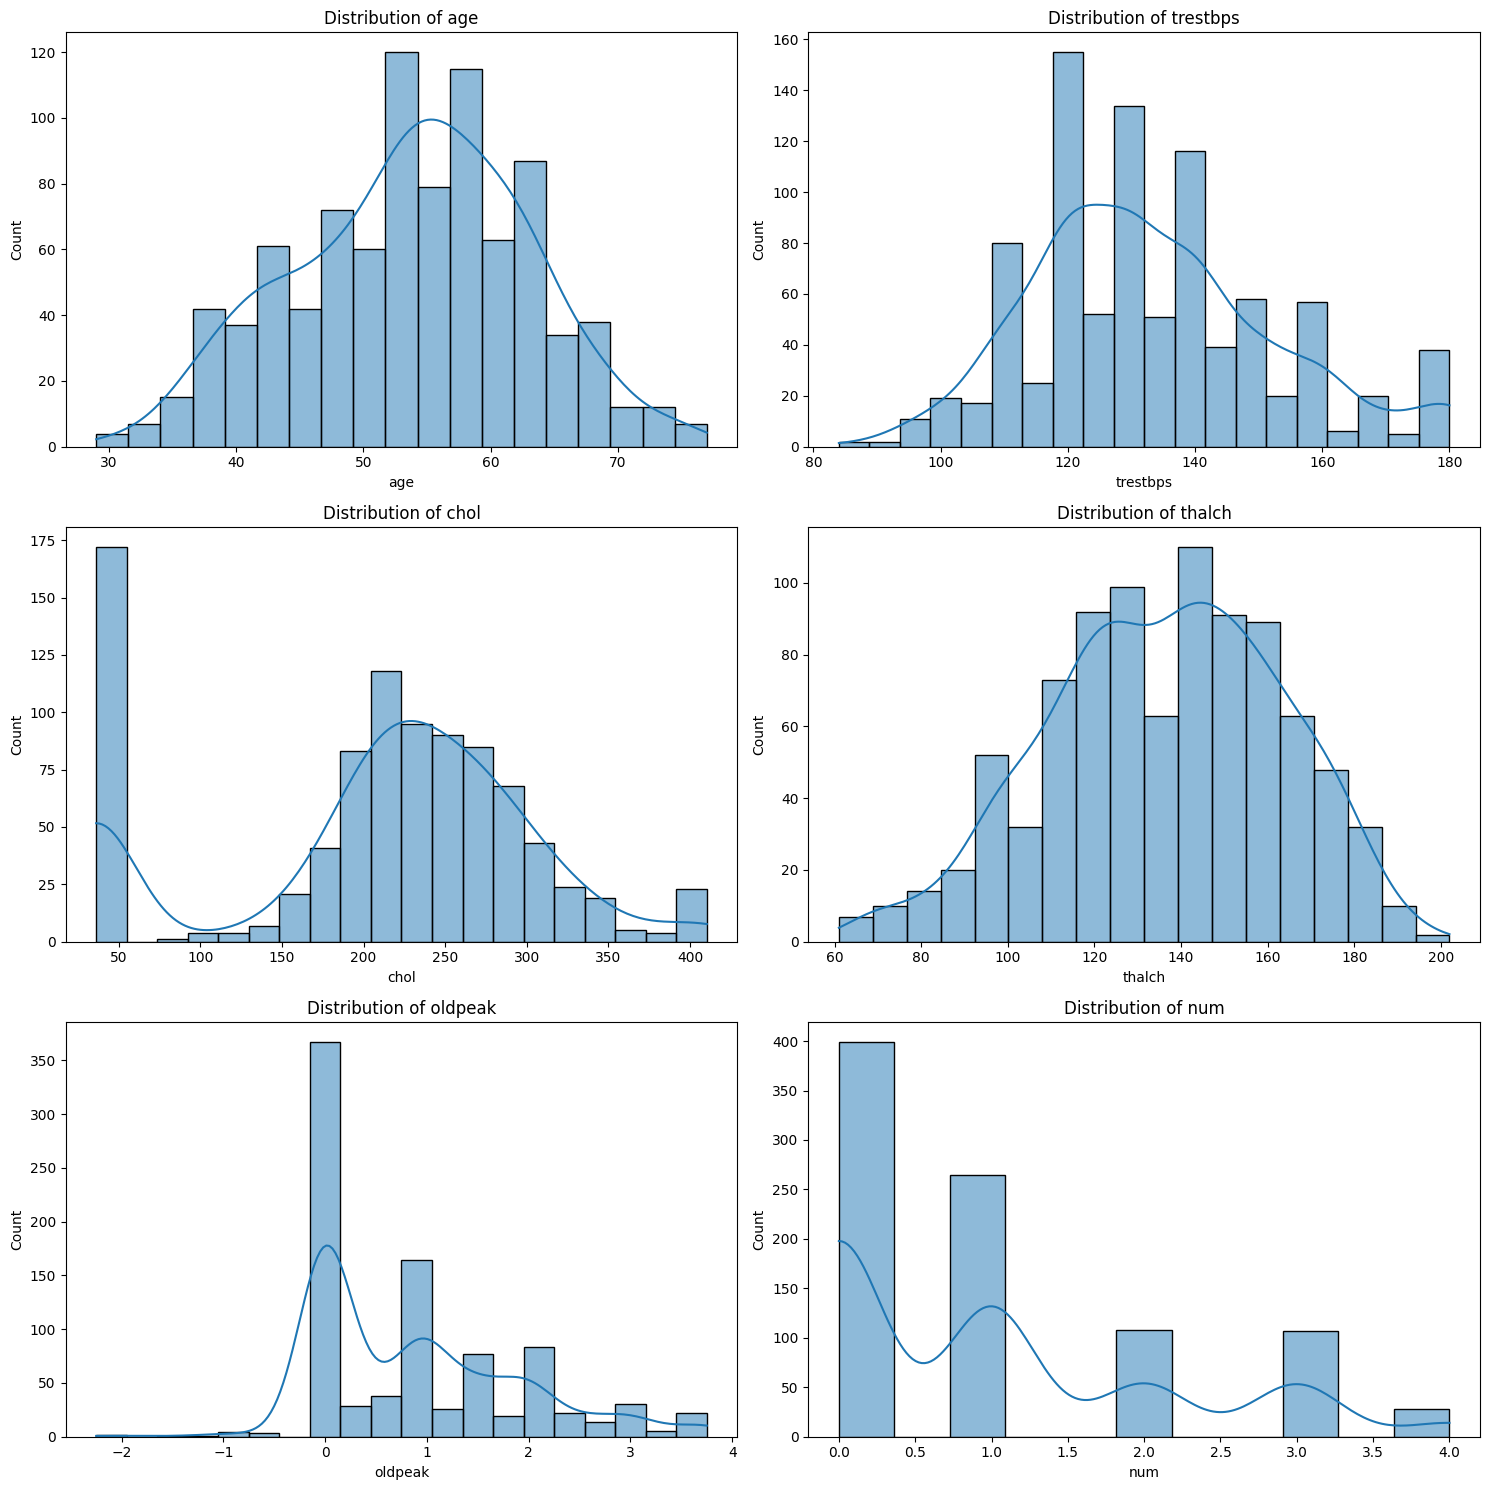

In [16]:
# histograms of all numerical variables

def plot_histograms_with_trend(df, cols_per_row=2):
    num_cols = len(df.columns)
    num_rows = (num_cols + cols_per_row - 1) // cols_per_row

    fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(15, 5 * num_rows))
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    for i, col in enumerate(df.columns):
        ax = axes[i]
        sns.histplot(df[col], kde=True, ax=ax)  # Use kde for trend line
        ax.set_title(f'Distribution of {col}')

    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
      fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_histograms_with_trend(hd_num)

In [17]:
hd_cat=data.drop(data.columns[[0,3,4,7,9,12]],axis=1)
hd_cat.head()

,sex,cp,fbs,restecg,exang,slope,thal
0,Male,typical angina,True,lv hypertrophy,FALSE,downsloping,fixed defect
1,Male,atypical angina,False,normal,FALSE,flat,fixed defect
2,Male,asymptomatic,False,normal,FALSE,flat,fixed defect
3,Male,typical angina,False,lv hypertrophy,FALSE,flat,fixed defect
4,Male,asymptomatic,False,normal,TRUE,flat,fixed defect


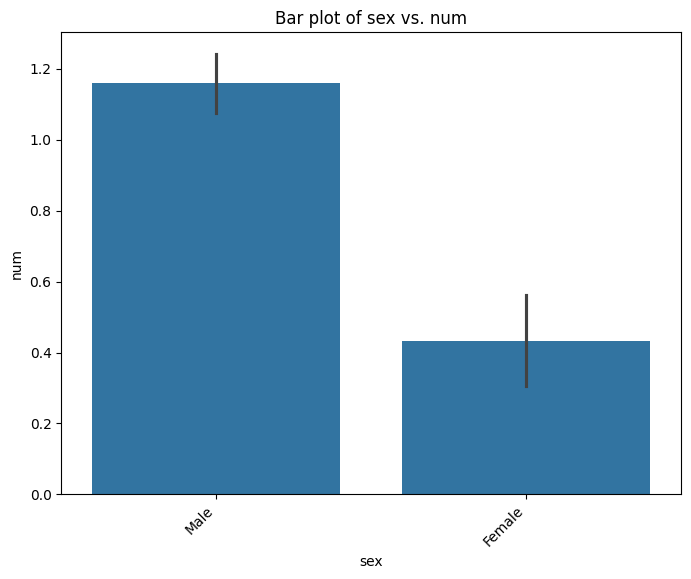

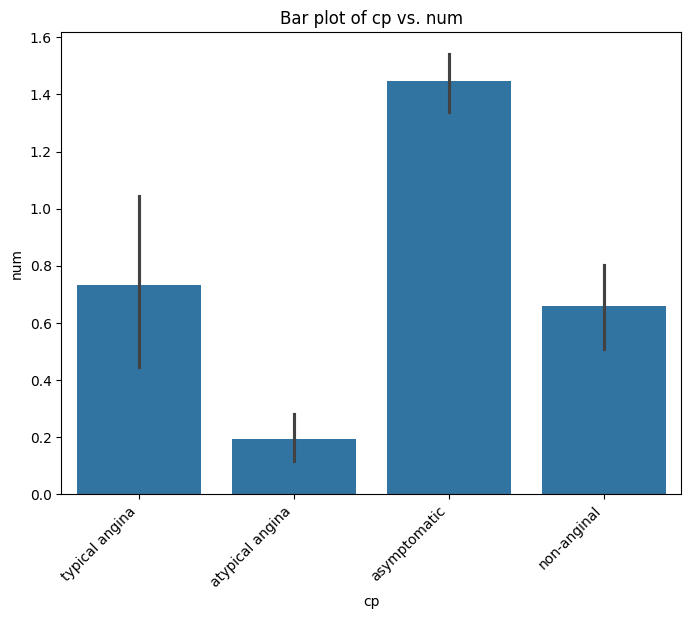

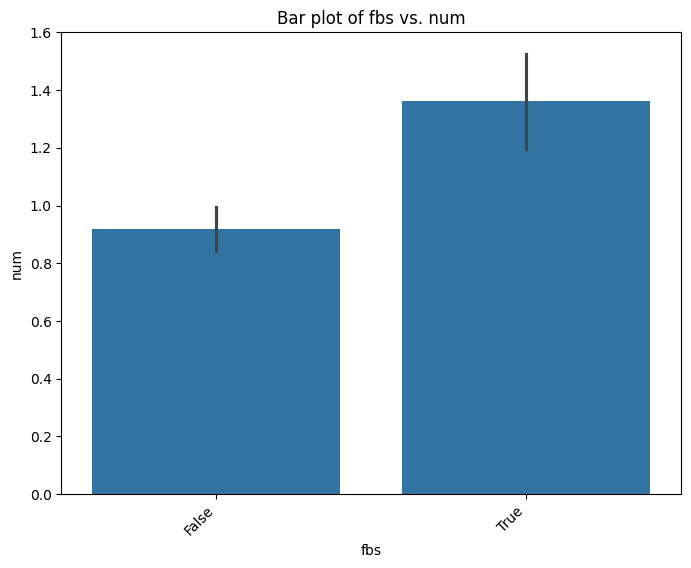

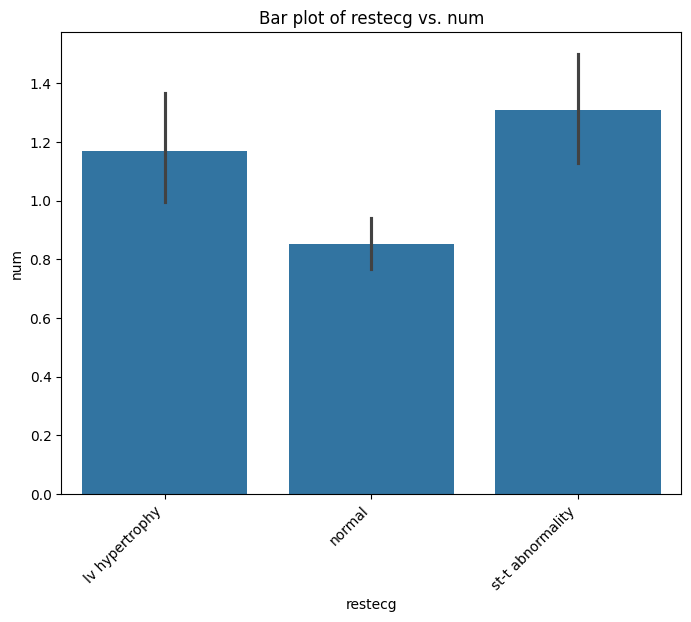

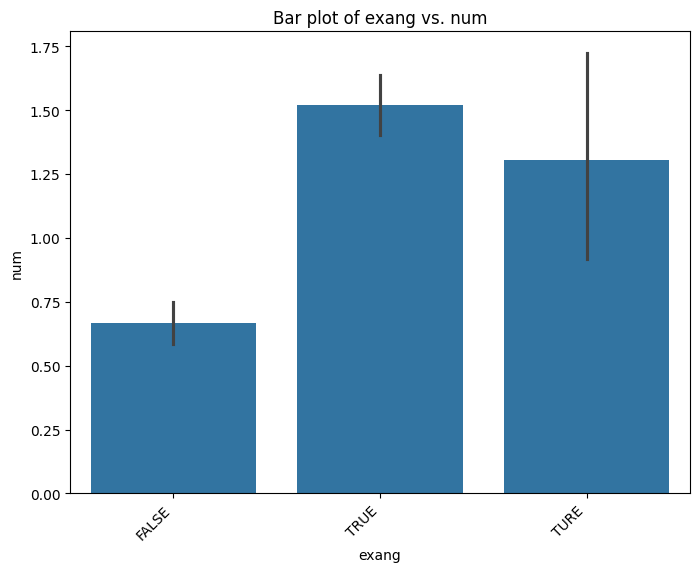

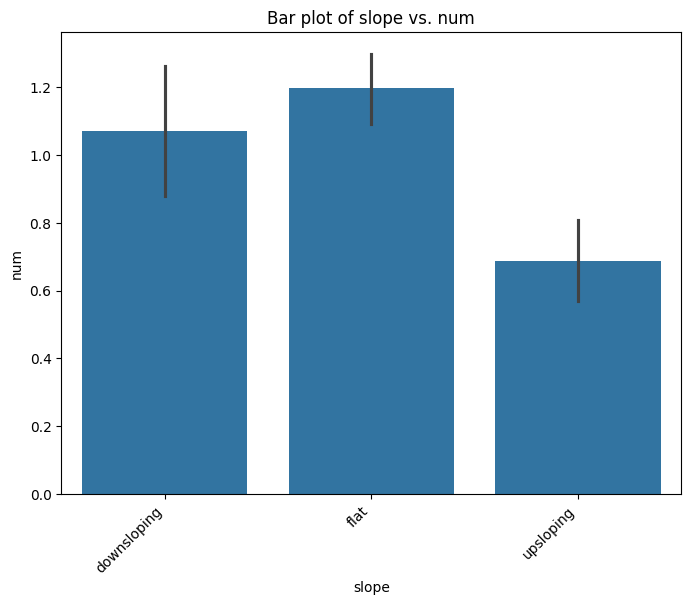

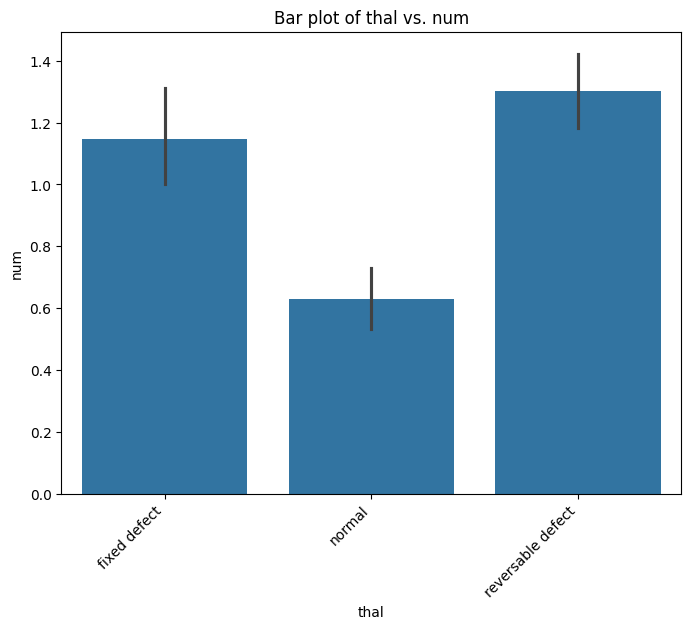

In [18]:
#  barplots of all categorical variables with num

for col in hd_cat.columns:
    plt.figure(figsize=(8, 6))
    sns.barplot(x=col, y=data['num'], data=hd_cat)
    plt.title(f'Bar plot of {col} vs. num')
    plt.xlabel(col)
    plt.ylabel('num')
    plt.xticks(rotation=45, ha='right')
    plt.show()

### Feature Selection

In [19]:
data_num=data.drop(data.columns[[1,2,5,6,8,10,11]],axis=1)
data_num.head()

,age,trestbps,chol,thalch,oldpeak,num
0,63,145,233.0,150,2.3,0
1,41,135,203.0,132,0.0,0
2,57,140,192.0,148,0.4,0
3,52,118,186.0,190,0.0,0
4,57,110,201.0,126,1.5,0


In [20]:
# Compute correlation matrix
corr_matrix = data_num.corr()
corr_matrix

,age,trestbps,chol,thalch,oldpeak,num
age,1.000000,0.261741,-0.092618,-0.327919,0.236649,0.326227
trestbps,0.261741,1.000000,0.126318,-0.131224,0.159640,0.141934
chol,-0.092618,0.126318,1.000000,0.194884,0.030649,-0.228771
thalch,-0.327919,-0.131224,0.194884,1.000000,-0.132703,-0.322633
oldpeak,0.236649,0.159640,0.030649,-0.132703,1.000000,0.418056
num,0.326227,0.141934,-0.228771,-0.322633,0.418056,1.000000


In [21]:
correlation_threshold = 0.1
numerical_features = corr_matrix.index[abs(corr_matrix['num']) > correlation_threshold].tolist()
numerical_features

['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num']

In [22]:
numerical_features.remove('num') # Use remove() method to remove an element from a list.

In [23]:
numerical_features

['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

In [24]:
categorical_cols = data.drop(data.columns[[0,3,4,7,9,12]],axis=1)
categorical_cols


,sex,cp,fbs,restecg,exang,slope,thal
0,Male,typical angina,True,lv hypertrophy,FALSE,downsloping,fixed defect
1,Male,atypical angina,False,normal,FALSE,flat,fixed defect
2,Male,asymptomatic,False,normal,FALSE,flat,fixed defect
3,Male,typical angina,False,lv hypertrophy,FALSE,flat,fixed defect
4,Male,asymptomatic,False,normal,TRUE,flat,fixed defect
...,...,...,...,...,...,...,...
903,Male,asymptomatic,False,normal,FALSE,upsloping,fixed defect
904,Male,asymptomatic,False,st-t abnormality,TRUE,flat,reversable defect
905,Male,non-anginal,False,lv hypertrophy,TRUE,downsloping,normal
906,Male,non-anginal,True,st-t abnormality,TURE,downsloping,fixed defect


In [25]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

In [26]:
# label encode categorical variables
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])


In [27]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233.0,1,0,150,0,2.3,0,0,0
1,41,1,1,135,203.0,0,1,132,0,0.0,1,0,0
2,57,1,0,140,192.0,0,1,148,0,0.4,1,0,0
3,52,1,3,118,186.0,0,0,190,0,0.0,1,0,0
4,57,1,0,110,201.0,0,1,126,1,1.5,1,0,0


In [28]:
# separate the target variable:
X = data.drop(data.columns[[0,3,4,7,9,12]], axis=1)
y = data['num']



In [29]:
y.head()

,num
0,0
1,0
2,0
3,0
4,0


In [30]:
X.head()

,sex,cp,fbs,restecg,exang,slope,thal
0,1,3,1,0,0,0,0
1,1,1,0,1,0,1,0
2,1,0,0,1,0,1,0
3,1,3,0,0,0,1,0
4,1,0,0,1,1,1,0


In [31]:
y.value_counts()

,count
num,
0,399
1,265
2,108
3,107
4,28


In [32]:
# scale the features:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X)
X_scaled = pd.DataFrame(scaled_data, columns=X.columns)


In [33]:
# categorical feature selection using chi2:
chi2_selector = SelectKBest(chi2, k='all')
chi2_selector.fit(X_scaled, y)  # Use the scaled features and original target
chi2_scores = pd.Series(chi2_selector.scores_, index=X_scaled.columns)

In [34]:
chi2_threshold = np.percentile(chi2_scores, 40)  # Select top 40% features
categorical_features = chi2_scores[chi2_scores > chi2_threshold].index.tolist()
categorical_features

['sex', 'cp', 'fbs', 'exang']

In [35]:
selected_features = list(set(numerical_features + categorical_features))
selected_features

['trestbps', 'cp', 'exang', 'oldpeak', 'age', 'thalch', 'sex', 'fbs', 'chol']

In [36]:
# data with selected features
data = data[selected_features + ['num']]
data.head()


,trestbps,cp,exang,oldpeak,age,thalch,sex,fbs,chol,num
0,145,3,0,2.3,63,150,1,1,233.0,0
1,135,1,0,0.0,41,132,1,0,203.0,0
2,140,0,0,0.4,57,148,1,0,192.0,0
3,118,3,0,0.0,52,190,1,0,186.0,0
4,110,0,1,1.5,57,126,1,0,201.0,0


In [37]:
# drop 'trestbps' due to multicollinearity evident in correlation matrix
data=data.drop(['trestbps'],axis=1)
data.head()

,cp,exang,oldpeak,age,thalch,sex,fbs,chol,num
0,3,0,2.3,63,150,1,1,233.0,0
1,1,0,0.0,41,132,1,0,203.0,0
2,0,0,0.4,57,148,1,0,192.0,0
3,3,0,0.0,52,190,1,0,186.0,0
4,0,1,1.5,57,126,1,0,201.0,0


### Data Preprocessing

In [39]:
data_num=data.drop(data.columns[[0,1,5,6,8]],axis=1)
data_num.head()

,oldpeak,age,thalch,chol
0,2.3,63,150,233.0
1,0.0,41,132,203.0
2,0.4,57,148,192.0
3,0.0,52,190,186.0
4,1.5,57,126,201.0


In [40]:
data_cat=data.drop(data.columns[[2,3,4,7,8]],axis=1)
data_cat.head()

,cp,exang,sex,fbs
0,3,0,1,1
1,1,0,1,0
2,0,0,1,0
3,3,0,1,0
4,0,1,1,0


In [41]:
for column in data_cat.columns:
  print(f"Values and counts for column '{column}':")
  print(data_cat[column].value_counts())
  print("\n")

Values and counts for column 'cp':
cp
0    495
2    202
1    165
3     45
Name: count, dtype: int64


Values and counts for column 'exang':
exang
0    535
1    336
2     36
Name: count, dtype: int64


Values and counts for column 'sex':
sex
1    717
0    190
Name: count, dtype: int64


Values and counts for column 'fbs':
fbs
0    722
1    185
Name: count, dtype: int64




In [42]:
data['num'].value_counts()

,count
num,
0,399
1,265
2,108
3,107
4,28


In [43]:
# standardizing numerical variables

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform
data_num[['age','chol','thalch','oldpeak']] = scaler.fit_transform(data_num[['age', 'chol','thalch','oldpeak']])

data_num.head()

,oldpeak,age,thalch,chol
0,1.389942,1.006097,0.523305,0.265386
1,-0.865396,-1.396447,-0.148458,-0.043590
2,-0.473163,0.350858,0.448665,-0.156881
3,-0.865396,-0.195175,2.016110,-0.218677
4,0.605477,0.350858,-0.372378,-0.064188


In [46]:
# final dataframe
data_final=pd.concat([data_num,data_cat],axis=1)
data_final.head()

,oldpeak,age,thalch,chol,cp,exang,sex,fbs
0,1.389942,1.006097,0.523305,0.265386,3,0,1,1
1,-0.865396,-1.396447,-0.148458,-0.043590,1,0,1,0
2,-0.473163,0.350858,0.448665,-0.156881,0,0,1,0
3,-0.865396,-0.195175,2.016110,-0.218677,3,0,1,0
4,0.605477,0.350858,-0.372378,-0.064188,0,1,1,0


In [47]:
# adding target variable
data_final['num']=data['num']
data_final.head()

,oldpeak,age,thalch,chol,cp,exang,sex,fbs,num
0,1.389942,1.006097,0.523305,0.265386,3,0,1,1,0
1,-0.865396,-1.396447,-0.148458,-0.043590,1,0,1,0,0
2,-0.473163,0.350858,0.448665,-0.156881,0,0,1,0,0
3,-0.865396,-0.195175,2.016110,-0.218677,3,0,1,0,0
4,0.605477,0.350858,-0.372378,-0.064188,0,1,1,0,0


### Data Partition & Model Fitting


In [48]:
# define X and Y
X = data_final.drop('num', axis=1)
Y = data_final['num']

In [49]:
X.head()

,oldpeak,age,thalch,chol,cp,exang,sex,fbs
0,1.389942,1.006097,0.523305,0.265386,3,0,1,1
1,-0.865396,-1.396447,-0.148458,-0.043590,1,0,1,0
2,-0.473163,0.350858,0.448665,-0.156881,0,0,1,0
3,-0.865396,-0.195175,2.016110,-0.218677,3,0,1,0
4,0.605477,0.350858,-0.372378,-0.064188,0,1,1,0


In [50]:
Y.head()

,num
0,0
1,0
2,0
3,0
4,0


In [51]:
# Model Fitting

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a DecisionTreeClassifier model
model = DecisionTreeClassifier()

# Fit the model to the training data
model.fit(X_train, Y_train)

# Calculate the training accuracy
train_accuracy = model.score(X_train, Y_train)
print("Training Accuracy:", train_accuracy)

# Calculate the test accuracy
test_accuracy = model.score(X_test, Y_test)
print("Test Accuracy:", test_accuracy)

print("variance", np.round(np.mean(train_accuracy)-np.mean(test_accuracy),2))

Training Accuracy: 0.9986206896551724
Test Accuracy: 0.5164835164835165
variance 0.48


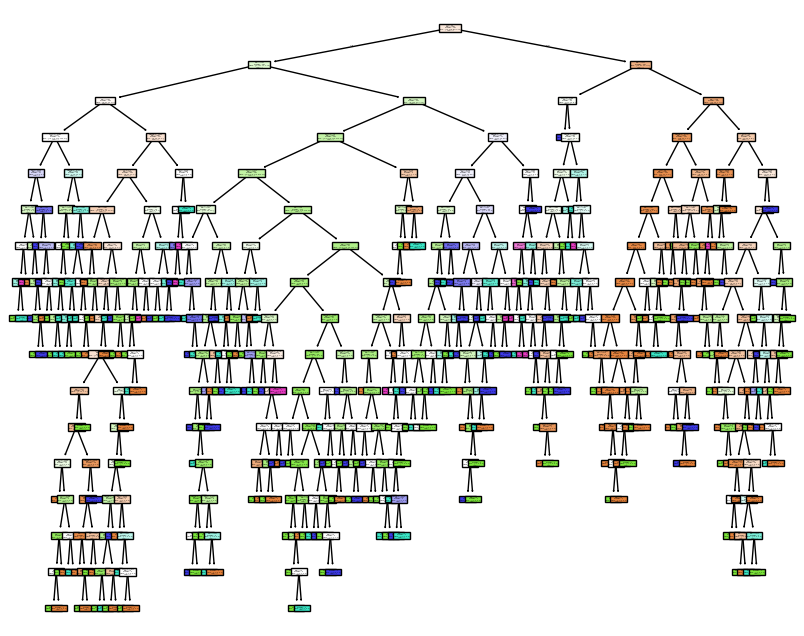

In [52]:
# visualizing the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import numpy as np

# Get unique class values from your target variable
unique_classes = np.unique(Y)

# Generate class names based on the number of unique classes
class_names = [str(cls) for cls in unique_classes]

plt.figure(figsize=(10, 8))
plot_tree(model, feature_names=X.columns, class_names=class_names, filled=True)
plt.show()

In [53]:
# Get the number of nodes
n_nodes = model.tree_.node_count
print("Number of nodes:", n_nodes)

# Get the depth of the tree
depth = model.tree_.max_depth
print("Depth of the tree:", depth)

Number of nodes: 567
Depth of the tree: 16


In [54]:
# cross validation
#------------------------------------------------------------------
from sklearn.metrics import accuracy_score


training_acc = []
test_acc = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.2, random_state=i)
    model = DecisionTreeClassifier()
    model.fit(X_train,Y_train)
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    training_acc.append(accuracy_score(Y_train,Y_pred_train))
    test_acc.append(accuracy_score(Y_test,Y_pred_test))

import numpy as np
print("Cross validatin training accuracy: ",np.round(np.mean(training_acc),2))
print("Cross validatin test accuracy: ",np.round(np.mean(test_acc),2))
print("variance", np.round(np.mean(training_acc)-np.mean(test_acc),2))

Cross validatin training accuracy:  1.0
Cross validatin test accuracy:  0.47
variance 0.53


In [55]:
# cross validation (with different depth)
#------------------------------------------------------------------
from sklearn.metrics import accuracy_score


training_acc = []
test_acc = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.2, random_state=i)
    model = DecisionTreeClassifier(max_depth=15)
    model.fit(X_train,Y_train)
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    training_acc.append(accuracy_score(Y_train,Y_pred_train))
    test_acc.append(accuracy_score(Y_test,Y_pred_test))

import numpy as np
print("Cross validatin training accuracy: ",np.round(np.mean(training_acc),2))
print("Cross validatin test accuracy: ",np.round(np.mean(test_acc),2))
print("variance", np.round(np.mean(training_acc)-np.mean(test_acc),2))

Cross validatin training accuracy:  0.99
Cross validatin test accuracy:  0.47
variance 0.52


In [56]:
# cross validation (with different depth)
#------------------------------------------------------------------
from sklearn.metrics import accuracy_score


training_acc = []
test_acc = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.2, random_state=i)
    model = DecisionTreeClassifier(max_depth=12)
    model.fit(X_train,Y_train)
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    training_acc.append(accuracy_score(Y_train,Y_pred_train))
    test_acc.append(accuracy_score(Y_test,Y_pred_test))

import numpy as np
print("Cross validatin training accuracy: ",np.round(np.mean(training_acc),2))
print("Cross validatin test accuracy: ",np.round(np.mean(test_acc),2))
print("variance", np.round(np.mean(training_acc)-np.mean(test_acc),2))

Cross validatin training accuracy:  0.95
Cross validatin test accuracy:  0.48
variance 0.47


In [57]:
# cross validation (with different depth)
#------------------------------------------------------------------
from sklearn.metrics import accuracy_score


training_acc = []
test_acc = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.2, random_state=i)
    model = DecisionTreeClassifier(max_depth=9)
    model.fit(X_train,Y_train)
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    training_acc.append(accuracy_score(Y_train,Y_pred_train))
    test_acc.append(accuracy_score(Y_test,Y_pred_test))

import numpy as np
print("Cross validatin training accuracy: ",np.round(np.mean(training_acc),2))
print("Cross validatin test accuracy: ",np.round(np.mean(test_acc),2))
print("variance", np.round(np.mean(training_acc)-np.mean(test_acc),2))

Cross validatin training accuracy:  0.84
Cross validatin test accuracy:  0.49
variance 0.34


In [58]:
# cross validation (with final depth)
#------------------------------------------------------------------
from sklearn.metrics import accuracy_score


training_acc = []
test_acc = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.2, random_state=i)
    model = DecisionTreeClassifier(max_depth=7)
    model.fit(X_train,Y_train)
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    training_acc.append(accuracy_score(Y_train,Y_pred_train))
    test_acc.append(accuracy_score(Y_test,Y_pred_test))

import numpy as np
print("Cross validatin training accuracy: ",np.round(np.mean(training_acc),2))
print("Cross validatin test accuracy: ",np.round(np.mean(test_acc),2))
print("variance", np.round(np.mean(training_acc)-np.mean(test_acc),2))

Cross validatin training accuracy:  0.74
Cross validatin test accuracy:  0.52
variance 0.22


In [59]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_test))

              precision    recall  f1-score   support

           0       0.72      0.69      0.71        85
           1       0.38      0.51      0.44        49
           2       0.32      0.36      0.34        22
           3       0.12      0.05      0.07        22
           4       0.00      0.00      0.00         4

    accuracy                           0.51       182
   macro avg       0.31      0.32      0.31       182
weighted avg       0.49      0.51      0.50       182



In [60]:
## BAGGING CLASSIFIER
#------------------------------------------------------------------

from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=7),
                        max_samples=0.6,
                        max_features=0.7,
                        n_estimators = 100, random_state=100)

In [61]:
# cross validation (Bagging)
from sklearn.metrics import accuracy_score
training_acc = []
test_acc = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.2, random_state=i)
    model.fit(X_train,Y_train)
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    training_acc.append(accuracy_score(Y_train,Y_pred_train))
    test_acc.append(accuracy_score(Y_test,Y_pred_test))

import numpy as np
print("Bagging-CV-training accuracy: ",np.round(np.mean(training_acc),2))
print("Bagging-CV-test accuracy: ",np.round(np.mean(test_acc),2))
print("variance", np.round(np.mean(training_acc)-np.mean(test_acc),2))

Bagging-CV-training accuracy:  0.79
Bagging-CV-test accuracy:  0.56
variance 0.22


In [62]:
# classification report (Bagging)

from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_test))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80        85
           1       0.36      0.57      0.44        49
           2       0.14      0.05      0.07        22
           3       0.67      0.18      0.29        22
           4       0.00      0.00      0.00         4

    accuracy                           0.57       182
   macro avg       0.39      0.33      0.32       182
weighted avg       0.56      0.57      0.54       182



In [63]:
## RANDOM FOREST
#------------------------------------------------------------------

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_samples=0.6,
                        max_features=0.7, max_depth=7,
                        n_estimators = 100, random_state=100)

# cross validation
from sklearn.metrics import accuracy_score
training_acc = []
test_acc = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.2, random_state=i)
    model.fit(X_train,Y_train)
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    training_acc.append(accuracy_score(Y_train,Y_pred_train))
    test_acc.append(accuracy_score(Y_test,Y_pred_test))

import numpy as np
print("RF-CV-training accuracy: ",np.round(np.mean(training_acc),2))
print("RF-CV-test accuracy: ",np.round(np.mean(test_acc),2))
print("variance", np.round(np.mean(training_acc)-np.mean(test_acc),2))

RF-CV-training accuracy:  0.8
RF-CV-test accuracy:  0.55
variance 0.25


In [64]:
# classification report (RANDOM FOREST)

from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_test))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74        85
           1       0.32      0.51      0.40        49
           2       0.12      0.05      0.07        22
           3       0.67      0.27      0.39        22
           4       0.00      0.00      0.00         4

    accuracy                           0.53       182
   macro avg       0.37      0.32      0.32       182
weighted avg       0.52      0.53      0.51       182



In [65]:
# GRADIENTBOOSTING CLASSIFIER
#------------------------------------------------------------------

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

training_acc = []
test_acc = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.2, random_state=i)
    model = GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,max_features=0.7,max_depth=7)
    model.fit(X_train,Y_train)
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    training_acc.append(accuracy_score(Y_train,Y_pred_train))
    test_acc.append(accuracy_score(Y_test,Y_pred_test))

import numpy as np
print("GBC-CV-training accuracy: ",np.round(np.mean(training_acc),2))
print("GBC-CV-test accuracy: ",np.round(np.mean(test_acc),2))
print("variance", np.round(np.mean(training_acc)-np.mean(test_acc),2))

GBC-CV-training accuracy:  1.0
GBC-CV-test accuracy:  0.53
variance 0.47


In [66]:
# classification report (GRADIENTBOOSTING)

from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_test))

              precision    recall  f1-score   support

           0       0.70      0.73      0.72        85
           1       0.32      0.43      0.37        49
           2       0.33      0.18      0.24        22
           3       0.50      0.27      0.35        22
           4       0.50      0.50      0.50         4

    accuracy                           0.52       182
   macro avg       0.47      0.42      0.43       182
weighted avg       0.53      0.52      0.52       182



In [67]:
# ADABOOSTING CLASSIFIER
#------------------------------------------------------------------

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

training_acc = []
test_acc = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.2, random_state=i)
    model = AdaBoostClassifier(n_estimators=100,learning_rate=0.1)
    model.fit(X_train,Y_train)
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    training_acc.append(accuracy_score(Y_train,Y_pred_train))
    test_acc.append(accuracy_score(Y_test,Y_pred_test))

import numpy as np
print("ABC-CV-training accuracy: ",np.round(np.mean(training_acc),2))
print("ABC-CV-test accuracy: ",np.round(np.mean(test_acc),2))
print("variance", np.round(np.mean(training_acc)-np.mean(test_acc),2))

ABC-CV-training accuracy:  0.59
ABC-CV-test accuracy:  0.56
variance 0.03


In [68]:
# classification report (ADABOOSTING)

from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_test))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81        85
           1       0.39      0.76      0.52        49
           2       0.50      0.05      0.08        22
           3       0.57      0.18      0.28        22
           4       0.00      0.00      0.00         4

    accuracy                           0.59       182
   macro avg       0.46      0.35      0.34       182
weighted avg       0.63      0.59      0.56       182



1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

**1. max_depth**

Effect:
**Smaller max_depth:** Limits tree size, reduces overfitting, and increases bias.
**Larger max_depth:** Allows the tree to grow deeper, reducing bias but increasing the risk of overfitting.

**2. min_samples_split**

Effect:
**Larger value:** Limits splits, resulting in simpler trees (reduces overfitting).
**Smaller value:** Allows more splits, leading to complex trees (increases risk of overfitting).

**3. min_samples_leaf**

Effect:
**Larger value:** Forces leaves to have more samples, creating a simpler tree and reducing overfitting.
**Smaller value:** Allows smaller leaf nodes, increasing complexity.

**4. max_features**

Effect:
**Smaller value:** Reduces computational cost and randomness; may prevent overfitting but risks underfitting.
**Larger value:** Increases model's ability to capture relationships but may lead to overfitting.

**5. max_leaf_nodes**

Effect:
**Smaller value:** Creates simpler trees, reduces overfitting.
**Larger value:** Allows more complexity but increases overfitting risk.

**6. min_impurity_decrease (or min_impurity_split in older versions)**

Effect:
**Larger value:** Reduces splits, leading to simpler trees.
**Smaller value:** Encourages more splits, creating complex trees.

**7. criterion**

Effect:
Both perform similarly, but entropy might be slower due to log calculations.

**8. class_weight**

Effect:
Adjusts the decision threshold to handle imbalanced classes better.

**9. splitter**

Choices:
best: Chooses the best split among all features.

random: Chooses the best split among a random subset of features.

Effect:
random adds randomness, helping in ensemble methods like Random Forest.

2) What is the difference between the Label encoding and One-hot encoding?

**Label Encoding**

Assigns a unique integer value to each category in a categorical feature.

-->Advantages:

Simple and efficient for ordinal data (categories with a natural order, like "Low", "Medium", "High").

Consumes less memory as it represents categories with a single column.

-->Disadvantages:

Introduces an artificial ordinal relationship between categories that might not exist for nominal data (e.g., "Red" being less than "Blue").

Can lead to biased models if the algorithm interprets these numbers as having a magnitude or order.

**One-Hot Encoding**

Converts each category into a separate binary column. For each row, one column is set to 1 (indicating the presence of that category), and all others are set to 0.

-->Advantages:

Does not introduce ordinal relationships between categories.

Works well with algorithms sensitive to numerical magnitudes or distances, like Logistic Regression, SVM, and Neural Networks.

-->Disadvantages:

Increases the dimensionality of the dataset, especially when the number of categories is large, leading to potential memory and computational inefficiency.

Can lead to the dummy variable trap (multicollinearity) if one-hot encoded features are used without dropping one column.

